In [0]:
#import library
library(readr)
library(dplyr)
library(ggplot2)
library(purrr)

In [48]:
#import dataset
df <- read_csv("forestfires.csv")
df[1:5,]

Parsed with column specification:
cols(
  X = col_double(),
  Y = col_double(),
  month = col_character(),
  day = col_character(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  temp = col_double(),
  RH = col_double(),
  wind = col_double(),
  rain = col_double(),
  area = col_double()
)



X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [0]:
df <- df %>%
  mutate(month = factor(month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")),
         day = factor(day, levels = c("sun", "mon", "tue", "wed", "thu", "fri", "sat")))

In [50]:
fires_by_month <- df %>% group_by(month) %>% summarize (total_fires = n())

`summarise()` ungrouping output (override with `.groups` argument)



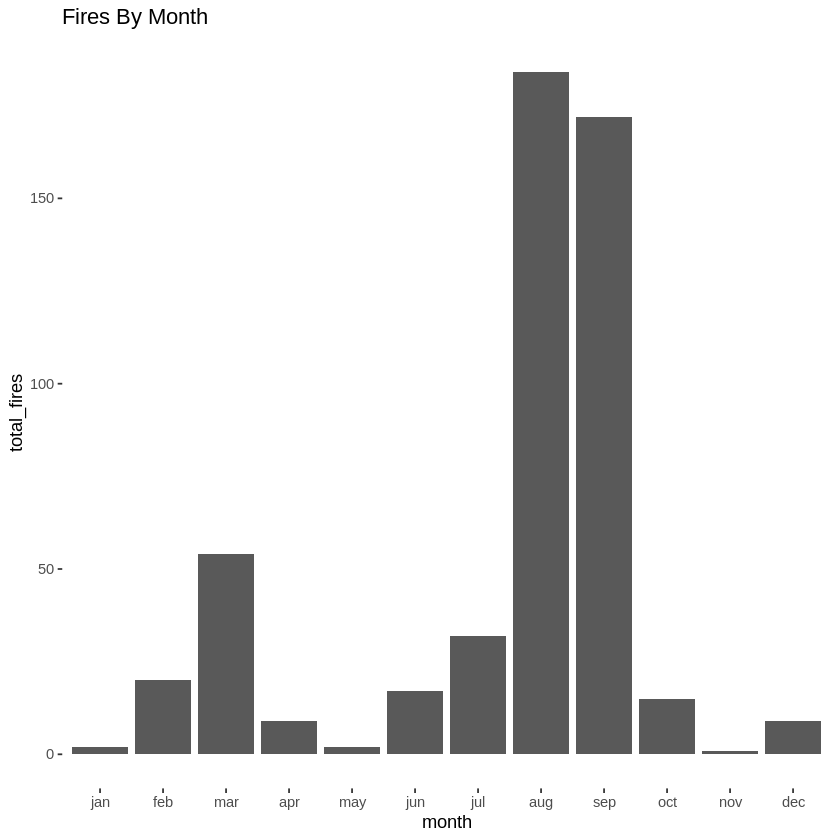

In [51]:
#Create Bar chart to showing the number of forest fires occuring during each month
ggplot(data =  fires_by_month,
  aes(y = total_fires, x = month)) +
  geom_bar(stat = "identity") +
  labs(title = "Fires By Month") + 
  theme(panel.background = element_rect(fill = "white"))

In [52]:
fires_by_day <- df %>% group_by(day) %>% summarize (total_fires = n())

`summarise()` ungrouping output (override with `.groups` argument)



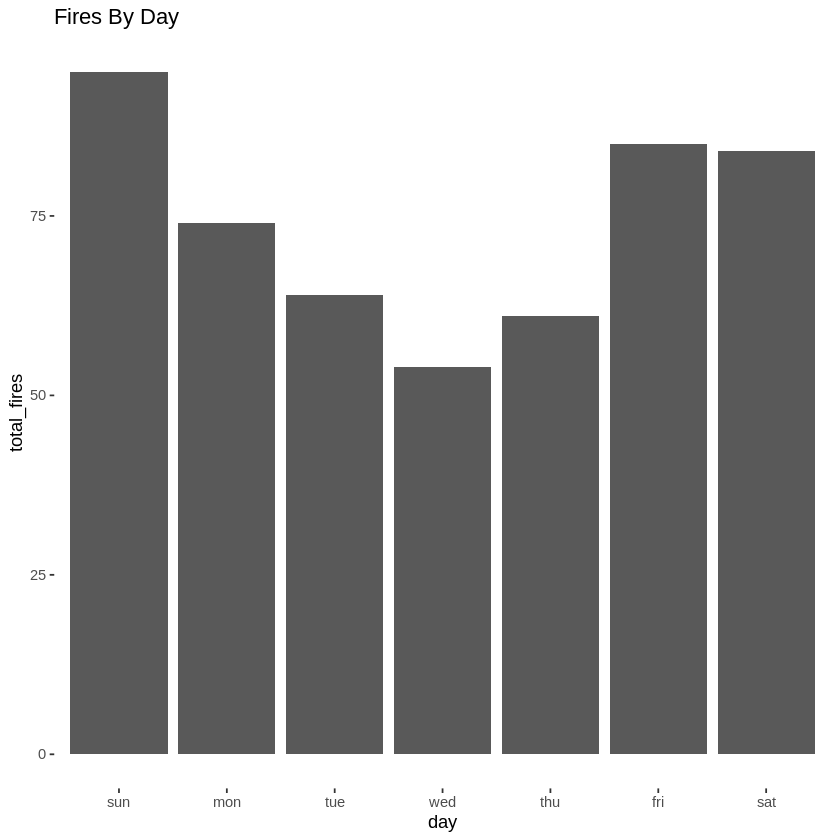

In [53]:
#Create Bar chart to showing the number of forest fires occuring during each day of the week
ggplot(data =  fires_by_day,
  aes(y = total_fires, x = day)) +
  geom_bar(stat = "identity") +
  labs(title = "Fires By Day")+
  theme(panel.background = element_rect(fill = "white"))

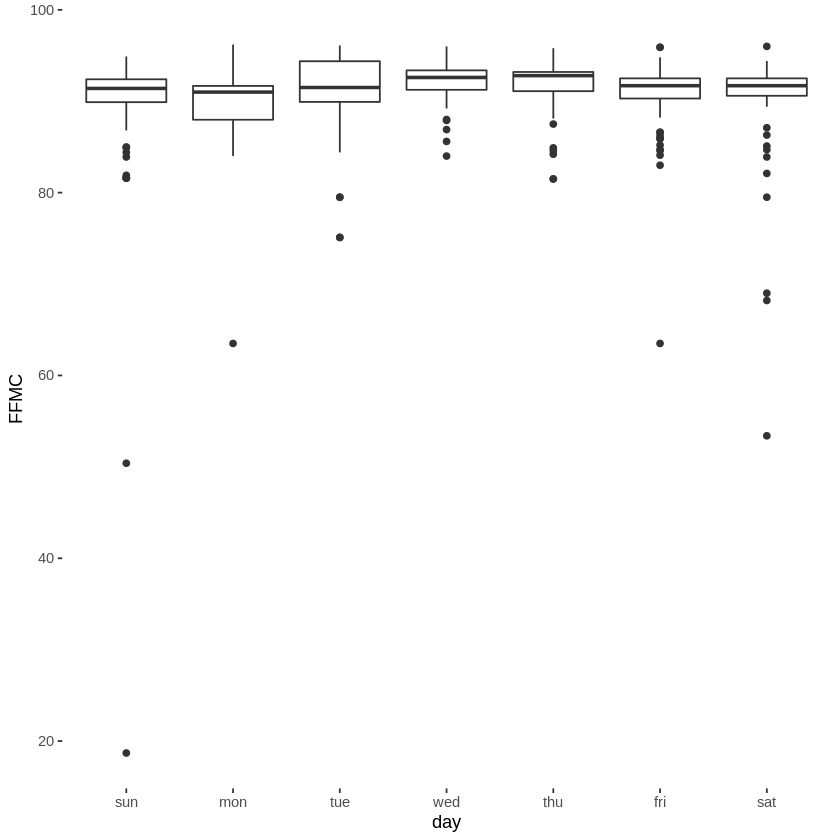

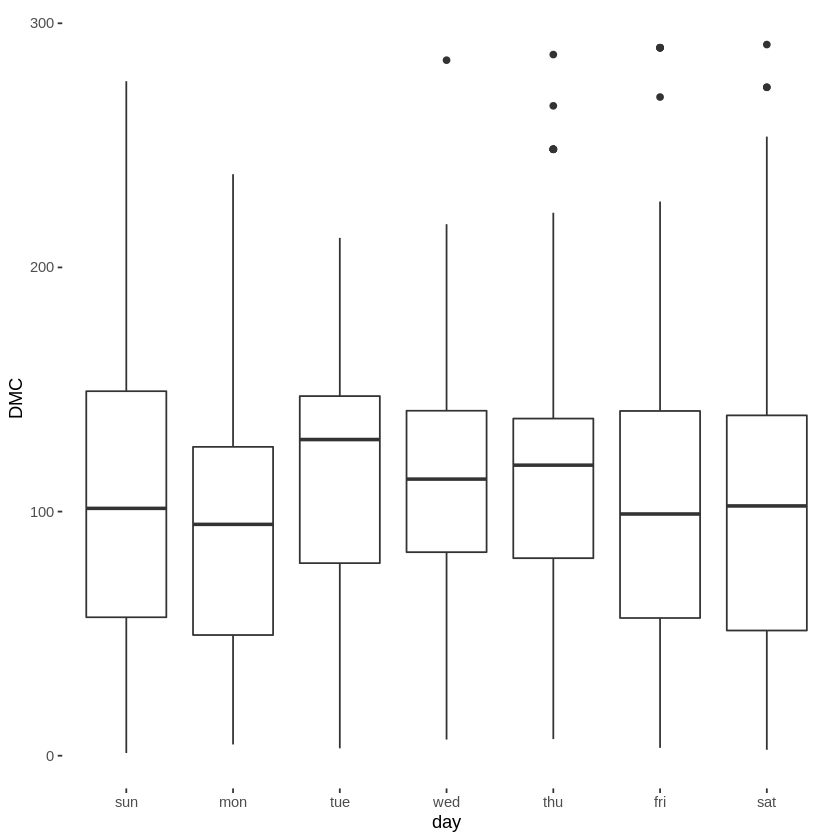

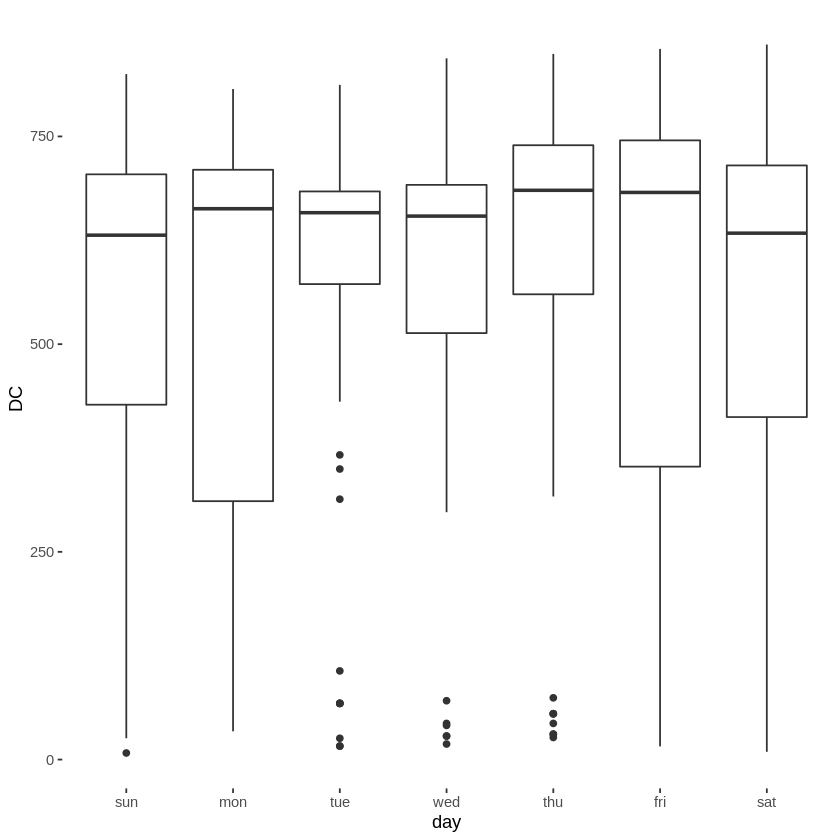

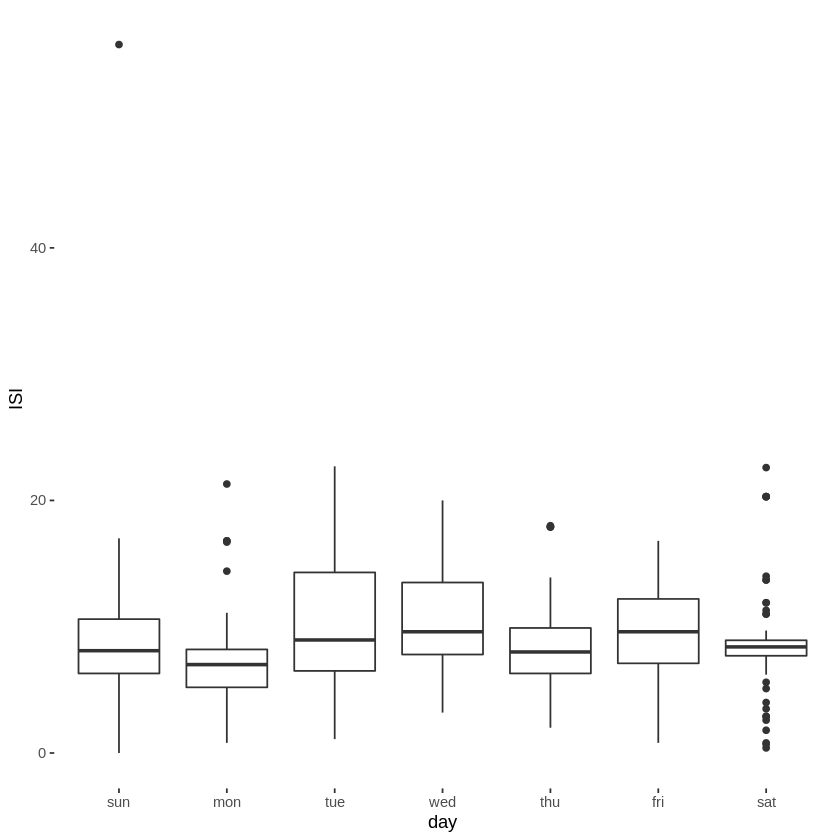

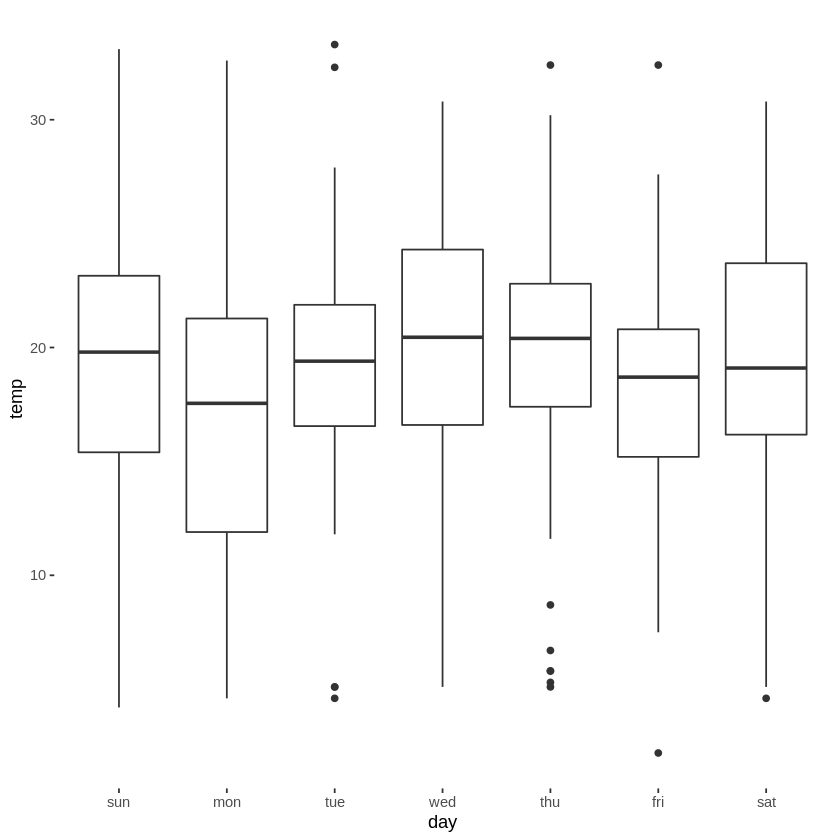

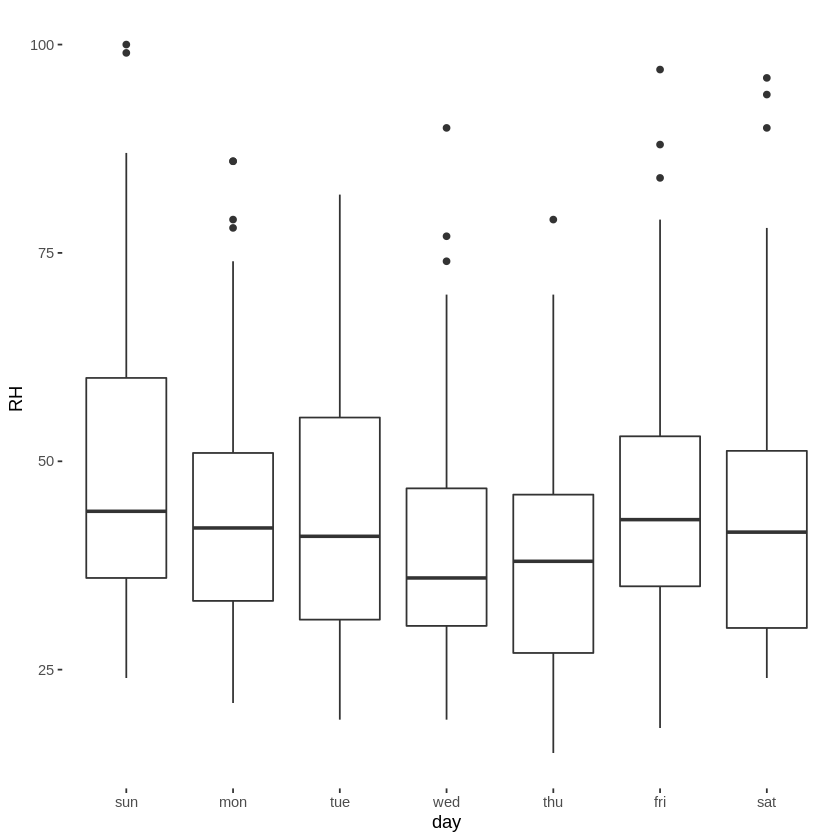

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


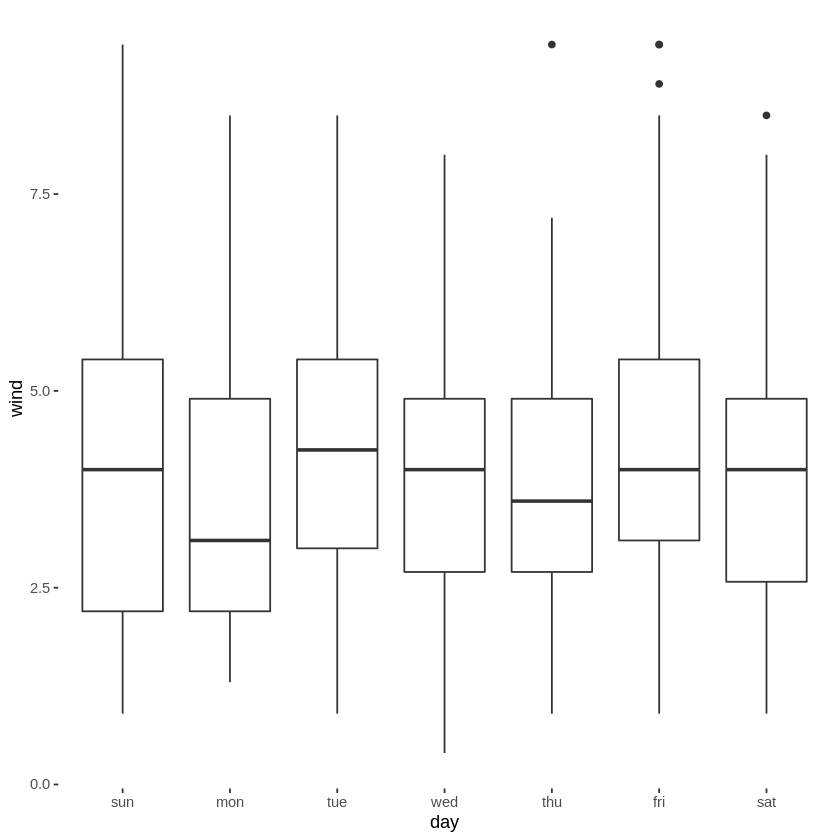

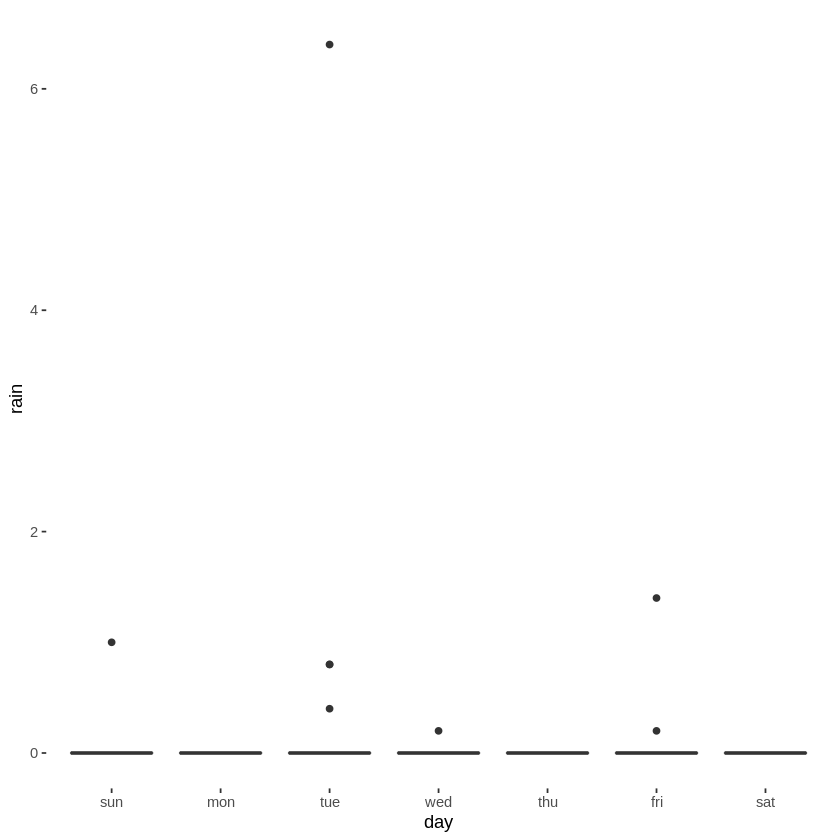

In [54]:
#Create function to make multiple box plot to visualize the distribution of the following variables by day
boxplot_day <- function(x, y) {
  ggplot(data = df) + 
    aes_string(x = x, y = y) +
    geom_boxplot() +
    theme(panel.background = element_rect(fill = "white"))
}

x_var <- names(df)[4]
y_var <- names(df)[5:12]

map2(x_var, y_var, boxplot_day)

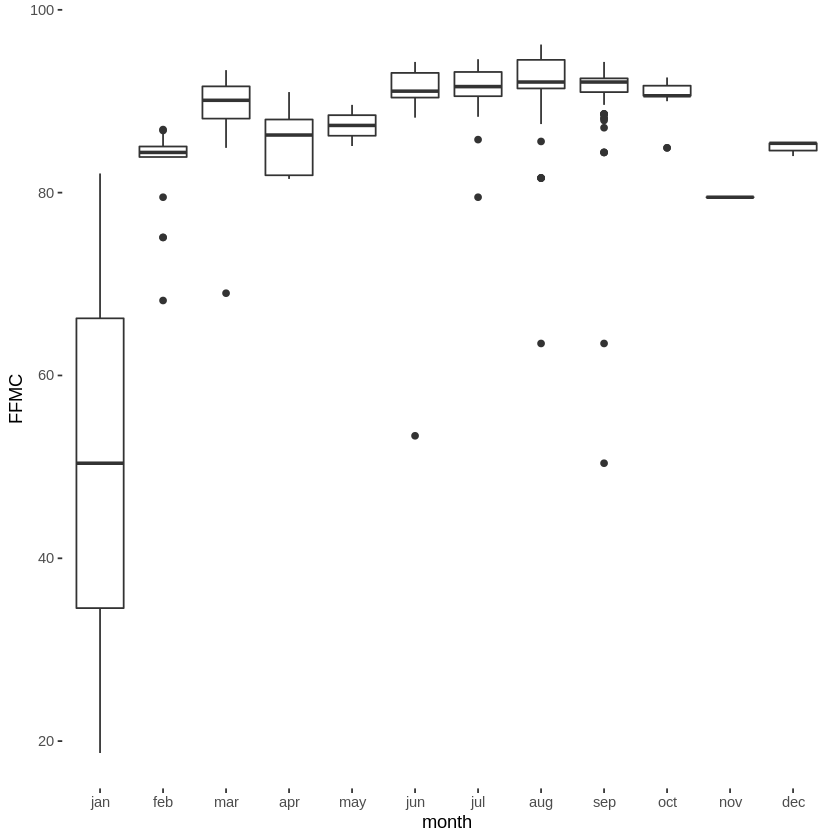

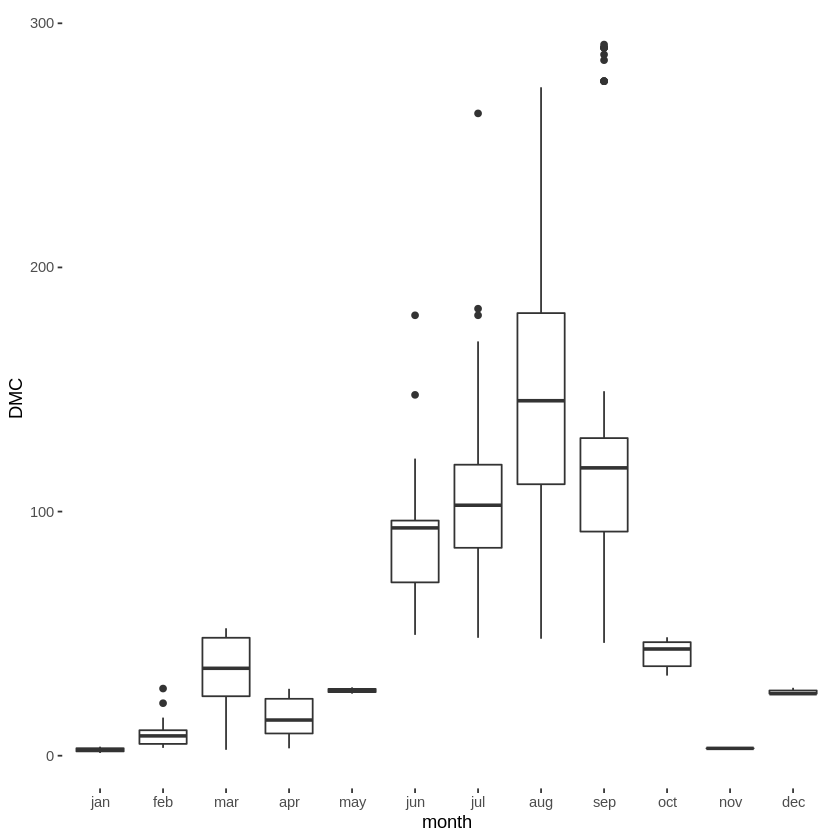

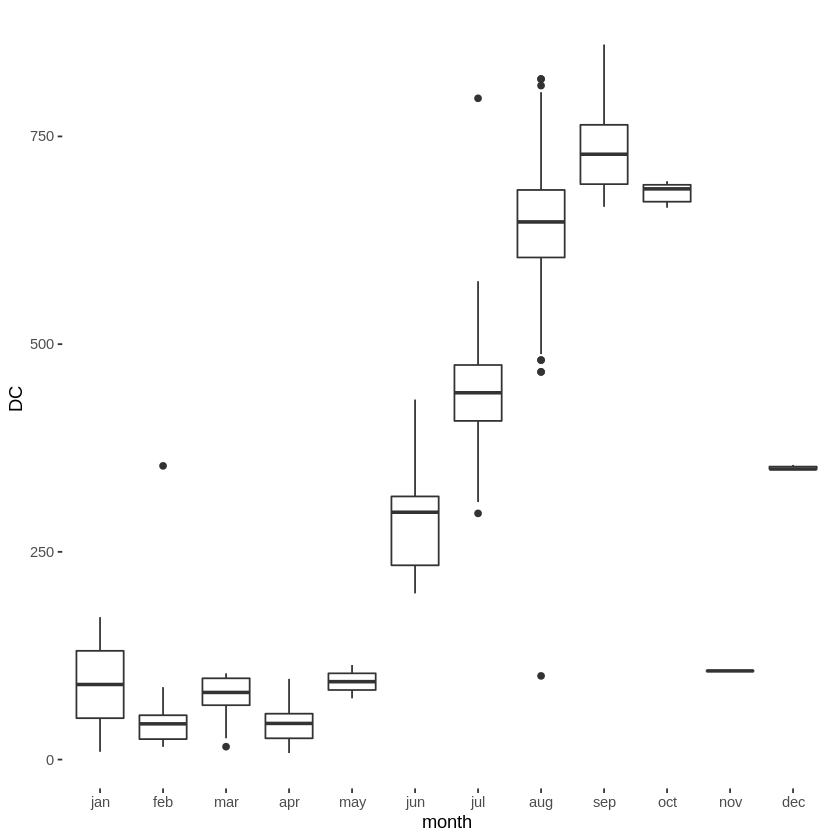

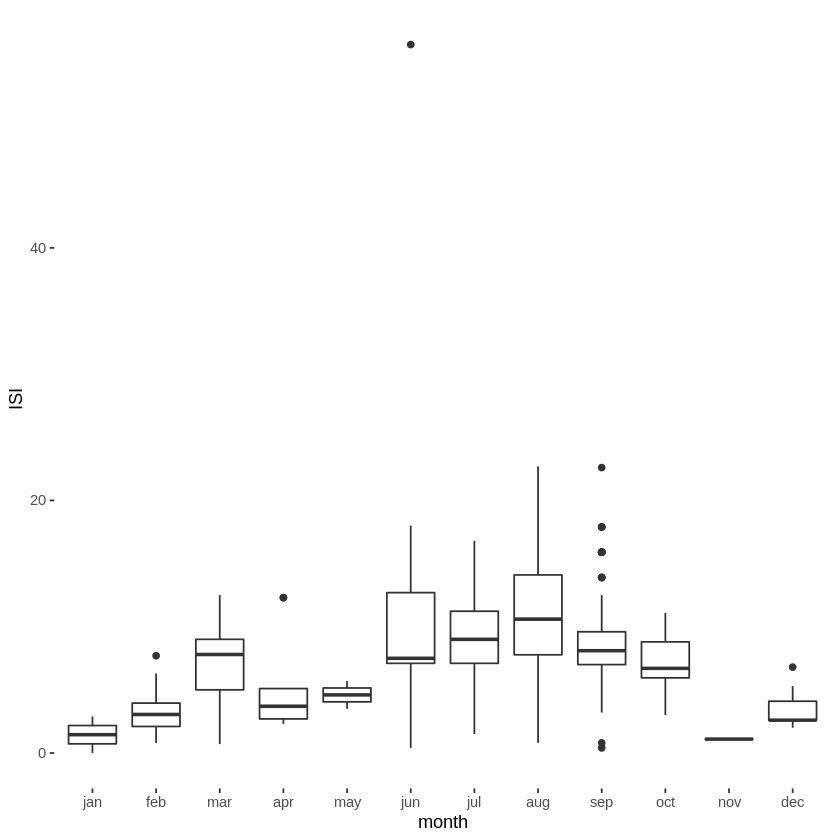

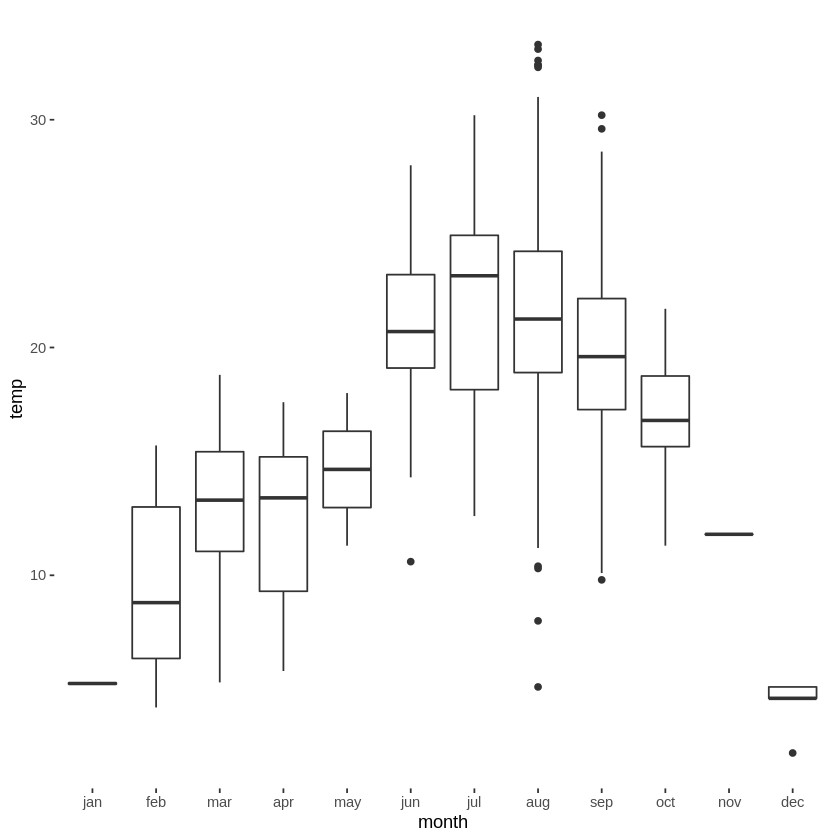

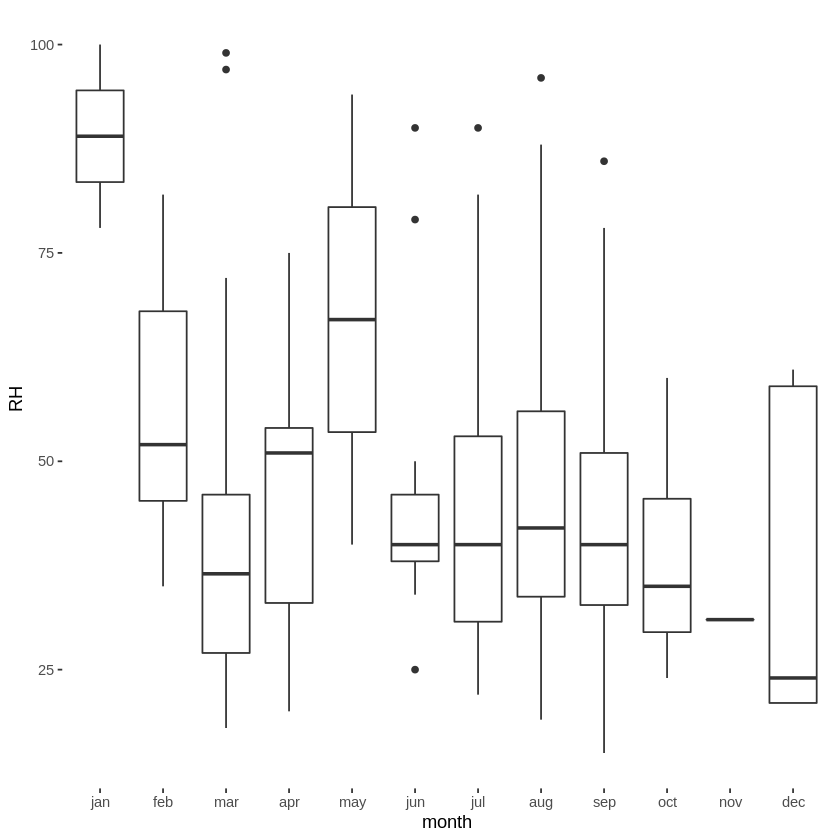

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


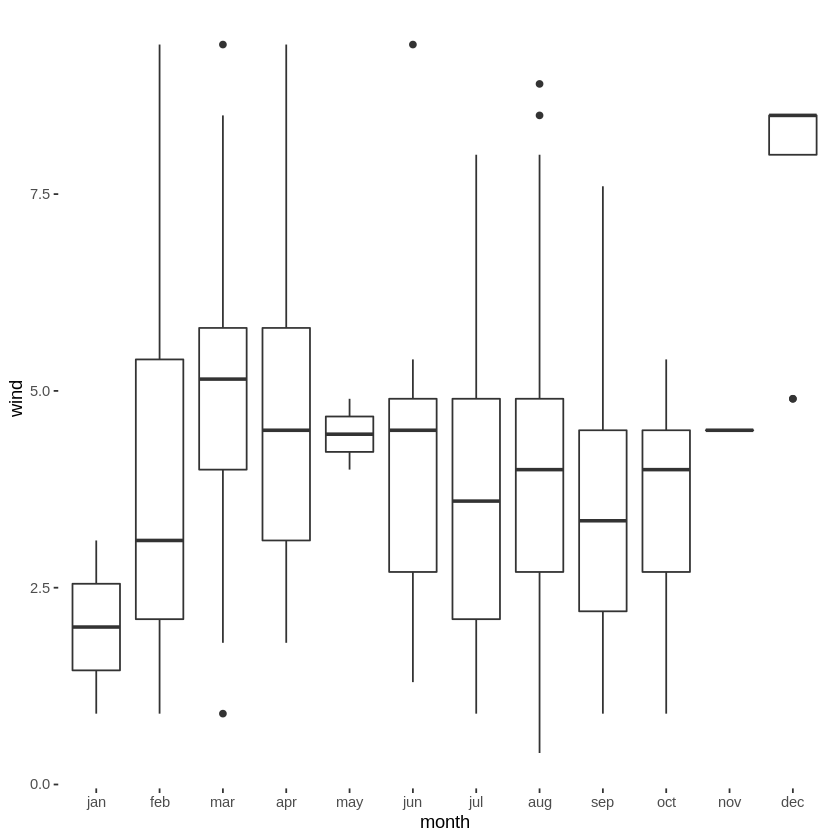

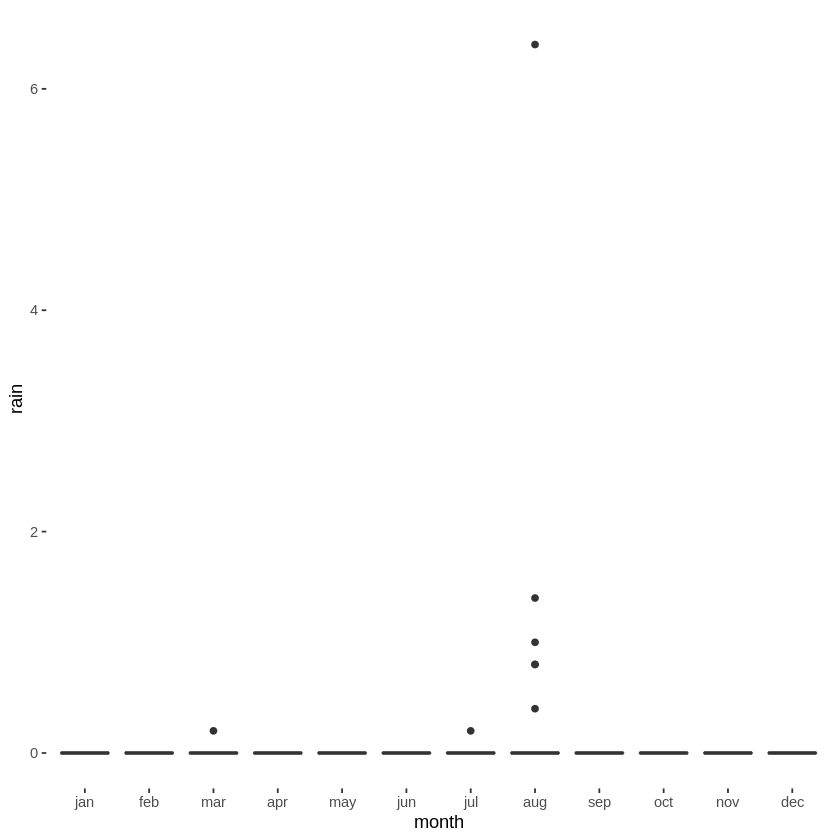

In [55]:
#Create function to make multiple box plot to visualize the distribution of the following variables by month
boxplot_month <- function(x, y) {
  ggplot(data = df) + 
    aes_string(x = x, y = y) +
    geom_boxplot() +
    theme(panel.background = element_rect(fill = "white"))
}

x_var <- names(df)[3]
y_var <- names(df)[5:12]

map2(x_var, y_var, boxplot_month)

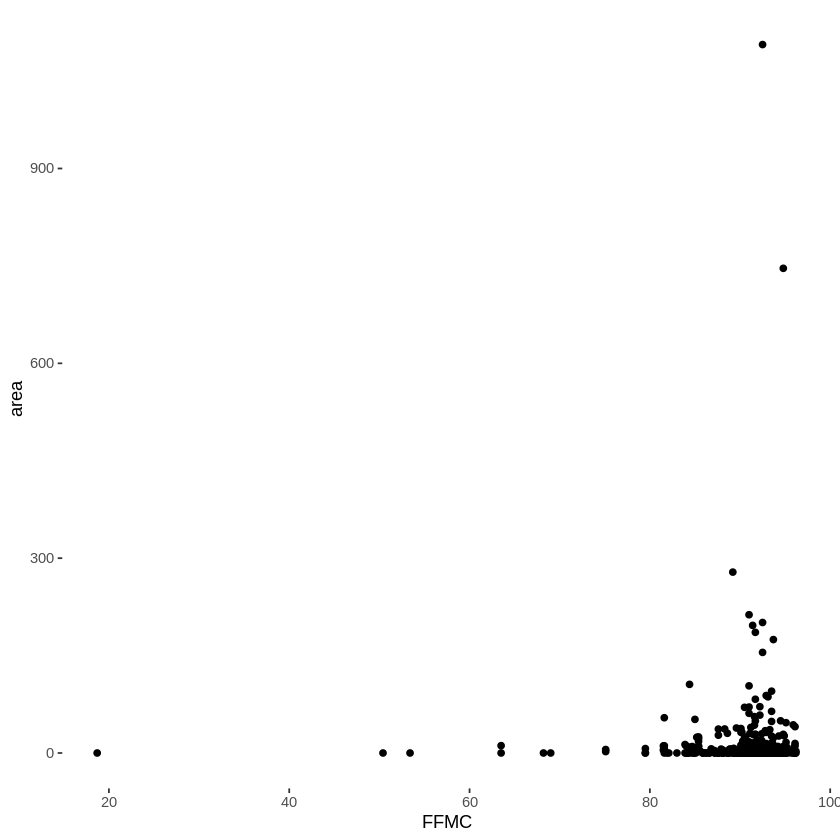

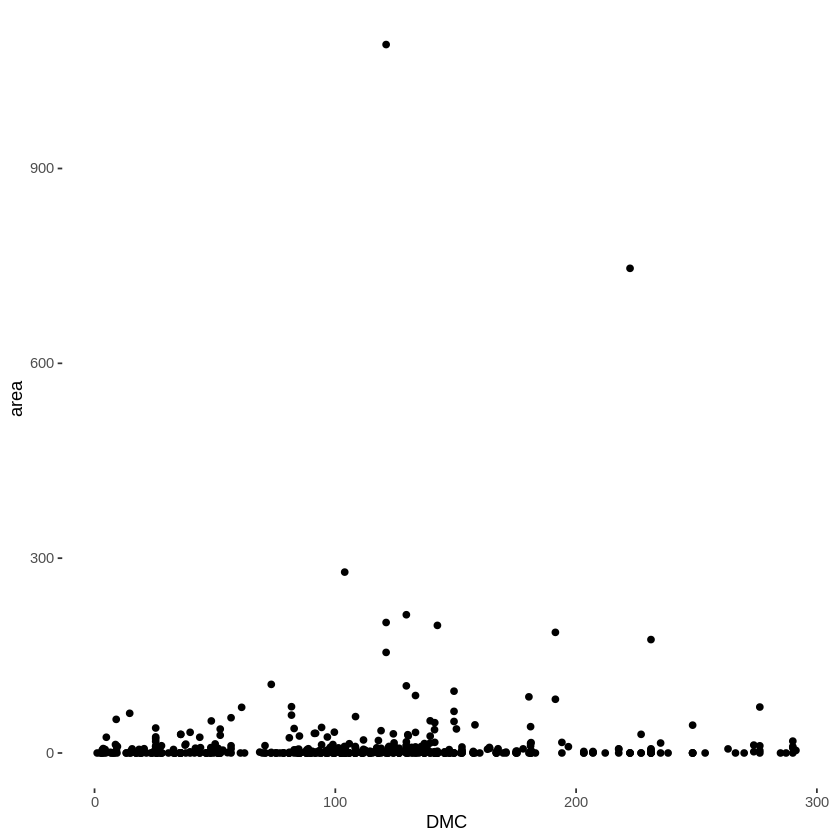

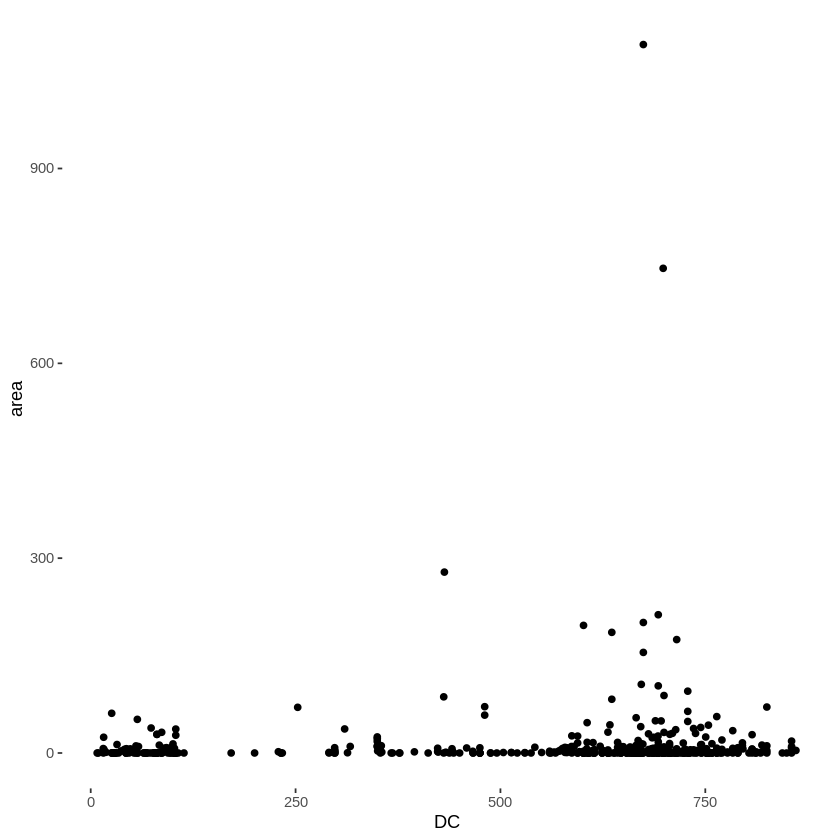

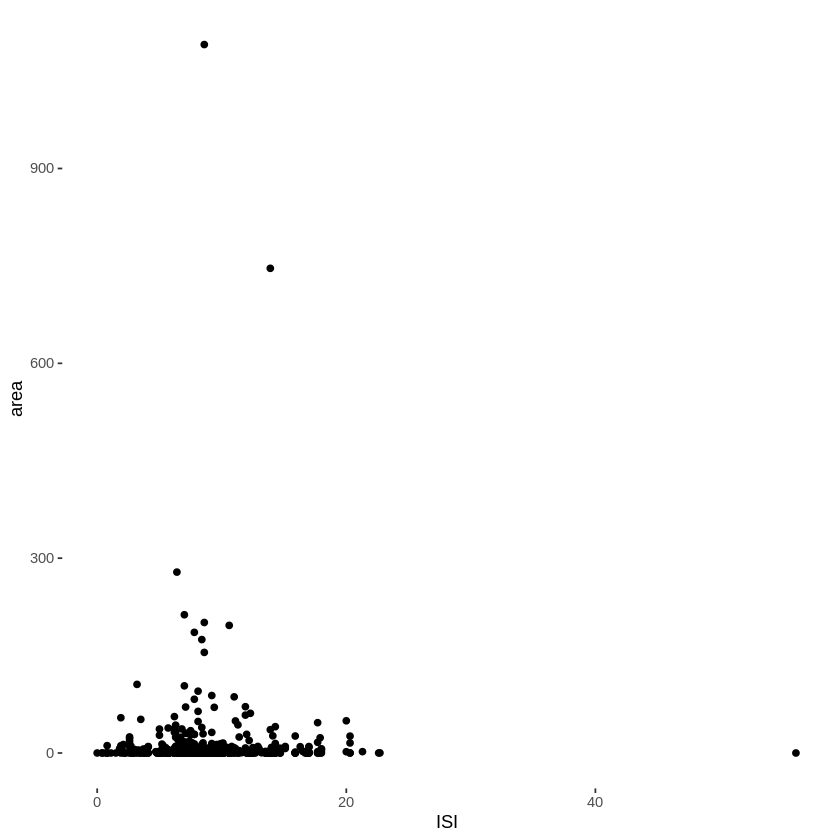

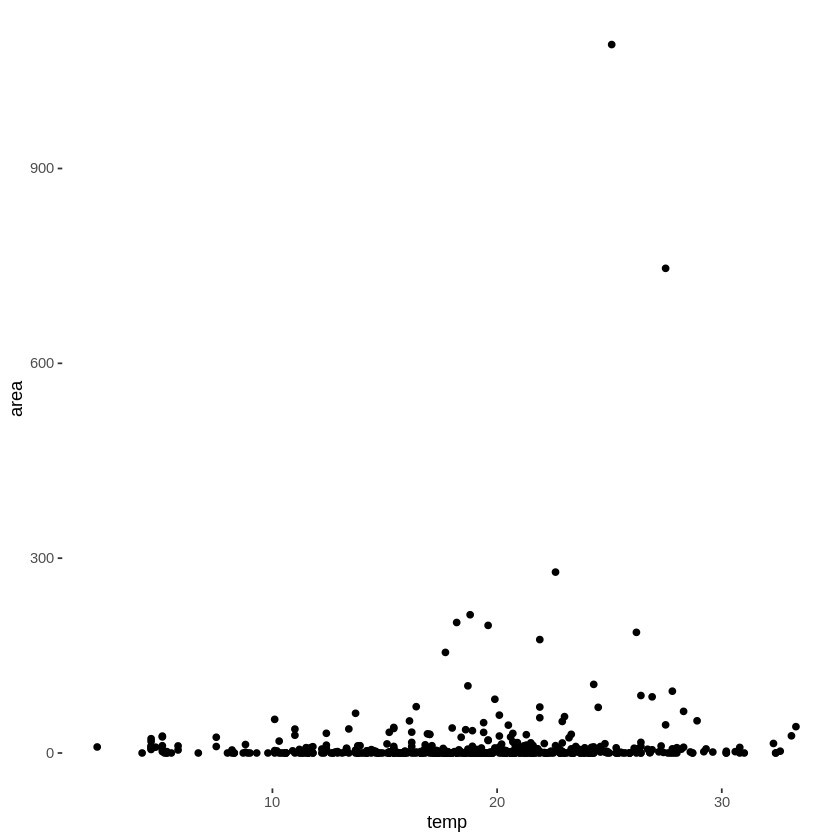

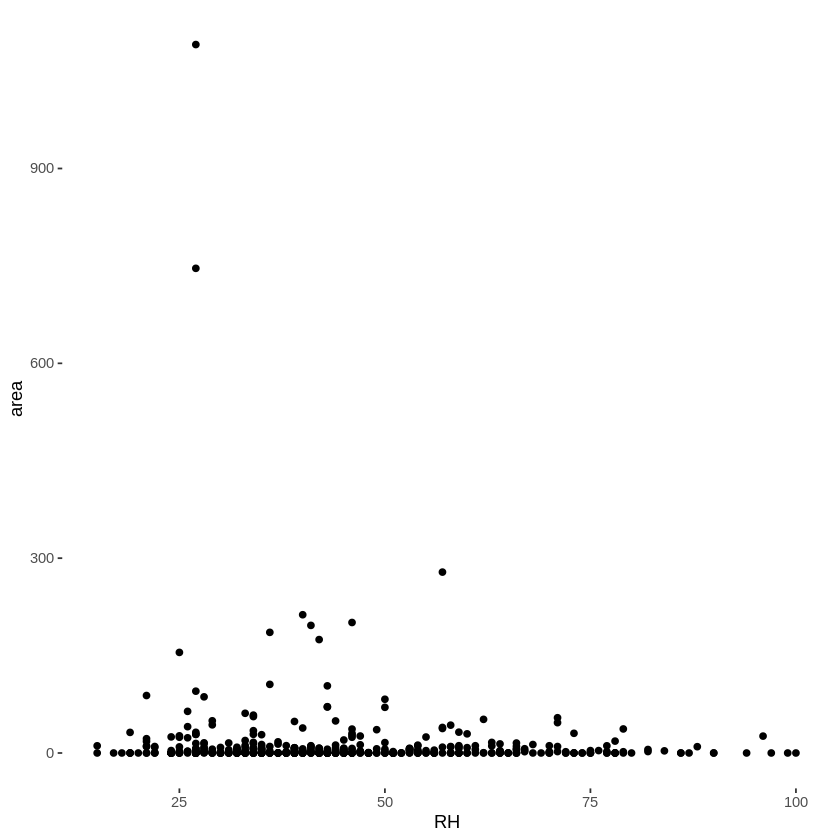

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


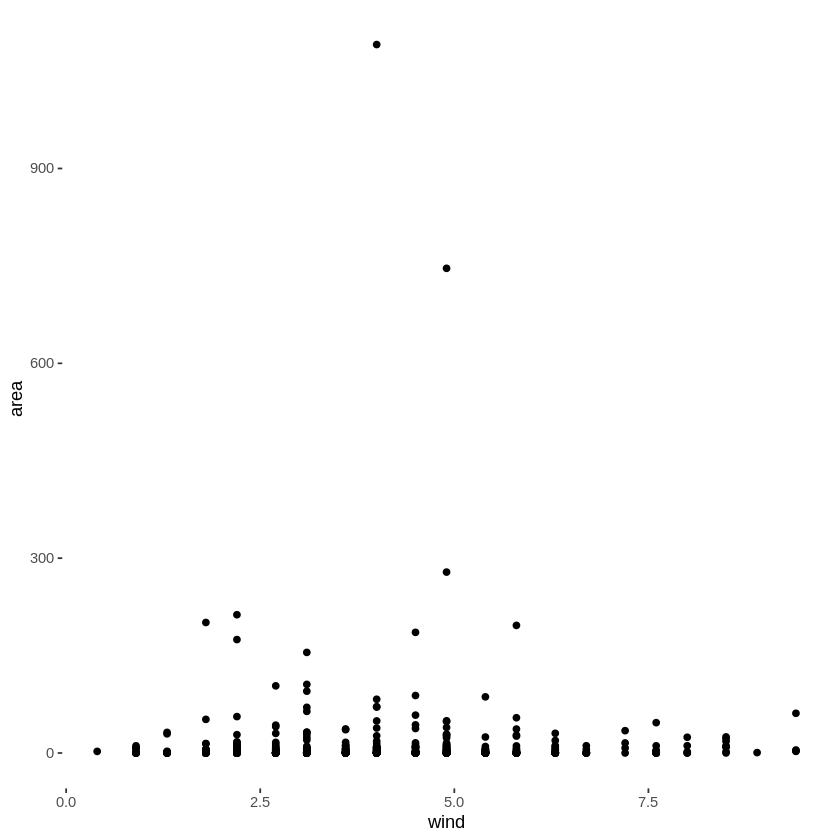

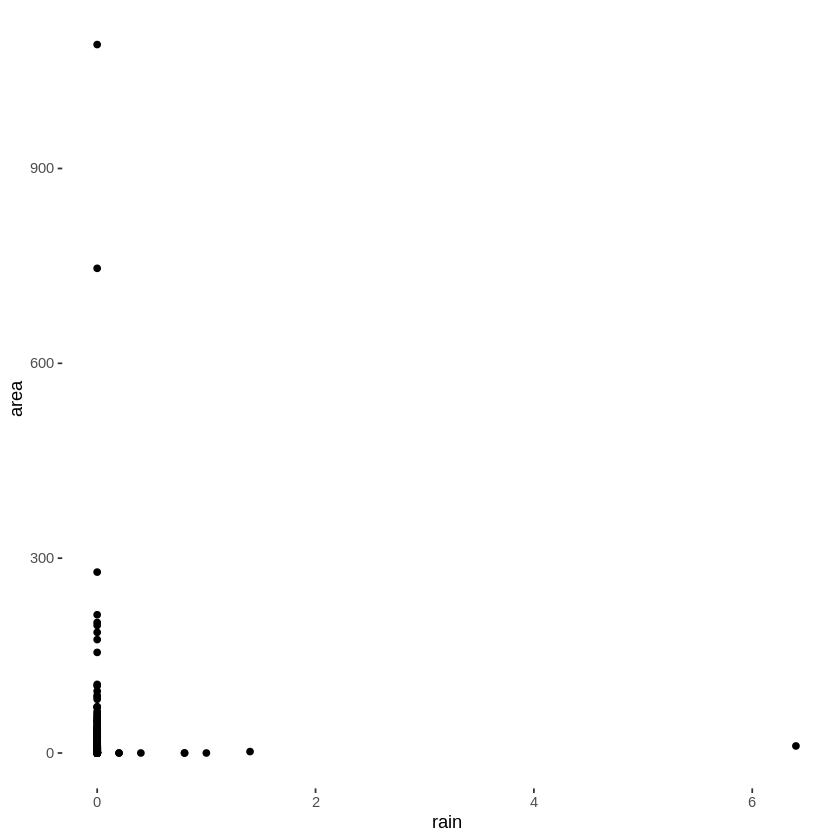

In [56]:
#Create function to make scatter plot to visualize we're interested in whether the variables above may affect forest fire area
create_scatter <- function(x, y) {
  ggplot(data = df) + 
    aes_string(x = x, y = y) +
    geom_point() +
    theme(panel.background = element_rect(fill = "white"))
}

y_var <- names(df)[13]
x_var <- names(df)[5:12]

map2(x_var, y_var, create_scatter)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



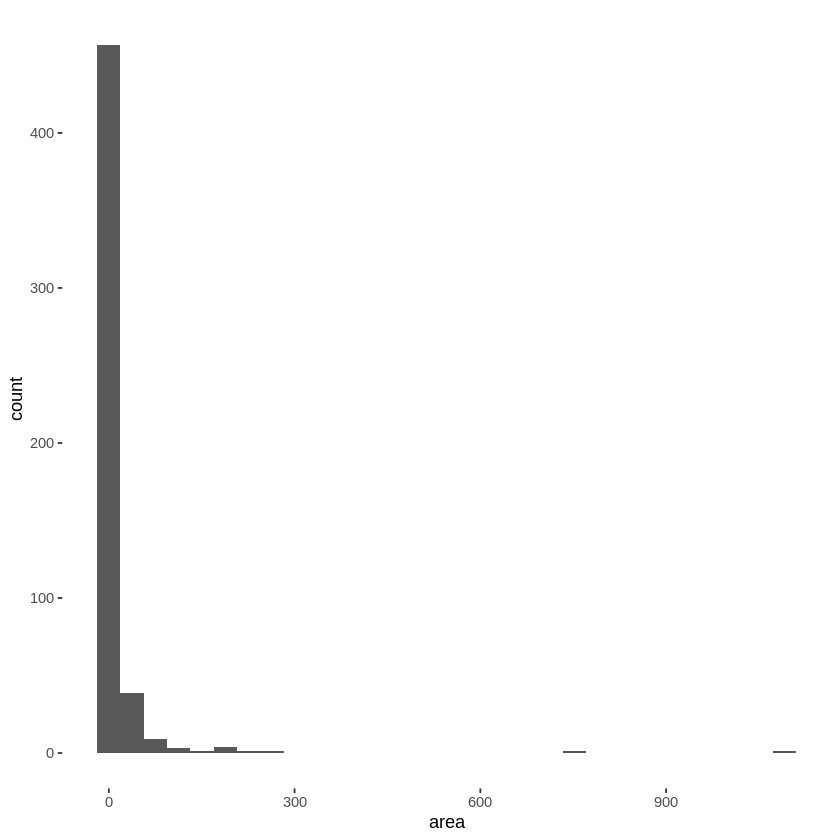

In [57]:
ggplot(data = df,
       aes(x=area))+
       geom_histogram() +
       theme(panel.background = element_rect(fill = "white"))